<a href="https://colab.research.google.com/github/OWEN-JUN/keras_/blob/master/day0730_colab_keras27_CIFAR10_dnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import SGD, Adam, RMSprop, Adadelta
import matplotlib.pyplot as plt
from keras.callbacks import *
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import keras
import keras.regularizers as regularizers

x_train shape: (50000, 32, 32, 3)
50000  train samples
32  test samples
(50000, 32, 32, 3)
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
(50000, 3072)


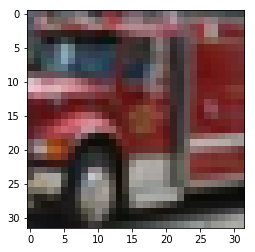

In [0]:
IMG_CHANNERLS = 3
IMG_ROWS = 32
IMG_COLS = 32

NB_EPOCH = 80
BATCH_SIZE = 500

NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
# OPTIM = RMSprop()
OPTIM = Adadelta()
(x_train, y_train),(x_test, y_test) = cifar10.load_data()
print("x_train shape:", x_train.shape)
print(x_train.shape[0], " train samples")
print(x_test.shape[1], " test samples")

digit = x_train[88]
plt.imshow(digit, cmap=plt.cm.binary)

# dim0 = x.shape[0]
# dim1 = x.shape[1]
# dim2 = x.shape[2]
# dim3 = x.shape[3]
# x_train = x_train.reshape(dim0, dim1 * dim2 * dim3)
# x_train = x_train.reshape(dim0, dim1 , dim2 , dim3)

def make_dim(x):
  x = x.flatten()
  x = x.reshape(x.shape[0],1)
  return x
def de_dim(x):
  x = x.flatten()
  # x = x.reshape((-1,3))
  # x = x.reshape((-1,32,3))
  # x = x.reshape((-1,32,32,3))
  x = x.reshape((-1,3072))
  x = x.reshape((-1,3072))
  return x

y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)
print(x_train.shape)
print(x_train[0])

x_train = make_dim(x_train)
# x_train = x_train.astype("float32")
# x_test = x_test.astype("float32")
mima = MinMaxScaler()
scaler = StandardScaler()

mima.fit(x_train)
scaler.fit(x_train)
x1 = mima.transform(x_train)
x2 = scaler.transform(x_train)
x1 = de_dim(x1)
x2 = de_dim(x2)
x_test = make_dim(x_test)
x_test1 = mima.transform(x_test)
x_test2 = scaler.transform(x_test)
x_test1 = de_dim(x_test1)

x_test2 = de_dim(x_test2)
print(x1.shape)

# print(x[0])
# print(x2[0])
# x_train/= 255
# x_test/= 255

In [0]:
network = Sequential()
network.add(Dense(1000, activation="relu", input_shape=(3072,)))
network.add(Dense(400, activation="relu", ))

network.add(Dropout(0.5))

network.add(Dense(500, activation="relu"))


network.add(Dropout(0.3))


network.add(Dense(500, activation="relu",))
network.add(Dense(350, activation="relu",))
network.add(Dropout(0.5))

network.add(Dense(200, activation="relu",))
network.add(Dense(800, activation="relu",))
network.add(Dropout(0.5))

network.add(Dense(800, activation="relu",))
network.add(Dense(350, activation="relu",))
network.add(Dropout(0.5))

network.add(Dense(200, activation="relu",))
network.add(Dense(700, activation="relu",))
network.add(Dropout(0.5))

network.add(Dense(200, activation="relu",))
network.add(Dense(350, activation="relu",))
network.add(Dropout(0.5))

network.add(Dense(400, activation="relu",))
network.add(Dense(500, activation="relu",))
network.add(BatchNormalization())
network.add(Dropout(0.5))


network.add(Dense(10,activation="softmax"))
network.summary()

tb_hist = keras.callbacks.TensorBoard(log_dir='./graph', histogram_freq=0, write_graph=True, write_images=True)

network.compile(loss="categorical_crossentropy", optimizer=OPTIM, metrics=["accuracy"])
early_stoping_callback = EarlyStopping(monitor="val_acc",patience=30)
history = network.fit(x1, y_train, batch_size=500, epochs=300, validation_split=0.35, verbose=2, callbacks=[early_stoping_callback, tb_hist])


print("Testing-----")
score = network.evaluate(x_test1, y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)

print("\nTest score:", score[0])
print("\nTest acc:", score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 1000)              3073000   
_________________________________________________________________
dense_78 (Dense)             (None, 400)               400400    
_________________________________________________________________
dropout_28 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_79 (Dense)             (None, 500)               200500    
_________________________________________________________________
dropout_29 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_80 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_81 (Dense)             (None, 350)               175350    
__________